# Data Preprocessing for Avito Using Pandas

This notebook contains Data pre processing of the avito ad demand dataset using pandas. The details about the dataset are in [data collection](https://github.com/niteeshhegde/classified-ad-demand/blob/master/data-collection.md) file. 

1) Google Cloud Platform's dataproc cluster is created with 1 master and 2 slaves with 4 Cores of CPU and 8 Gi of memory each. Select Anacpnda and Jupyter notebook as optional components.

2) After ssh into master node. Use socks5 protocol and connect to proxy server using Google Chrome

3) Jupyter notebok along with anaconda is preinstalled while creating cluster and is available on port 8123





### Reference Notebooks

A couple of notebooks are reffered from Kaggle forums which were helpful in making data wrangling more simpler, cleaner.

https://www.kaggle.com/shivamb/in-depth-analysis-visualisations-avito

https://www.kaggle.com/kabure/extensive-eda-of-deal-probability

Thanks to both of them.



### Data Wrangling



As Google cloud is used and Google data-store is where the dataset is stored, 
we import gcsfc for accessing with data in the storage bucket

In [2]:
!pip install gcsfs

     |████████████████████████████████| 71kB 4.8MB/s eta 0:00:011


In [3]:
import pandas as pd
import gcsfs

Here we are parsing activation_date while reading data 
Training data train.csv has 18 columns

In [9]:
df_train = pd.read_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/train.csv', parse_dates=["activation_date"])
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


### Dimensions of all the dataframes are in below cells 

In [7]:
df_train.shape


(1503424, 18)

#### Description of df_train

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

#### As we have already parsed activation_date while reading data into pandas dataframe, we can store day, month, week and weekday as separate columns as below

In [10]:
df_train['weekday'] = df_train.activation_date.dt.weekday
df_train['month'] = df_train.activation_date.dt.month
df_train['day'] = df_train.activation_date.dt.day
df_train['week'] = df_train.activation_date.dt.week 

In [11]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,weekday,month,day,week
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,1,3,28,13
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,6,3,26,12
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,0,3,20,12
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,5,3,25,12
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,3,3,16,11


#### Description and title and cleant and 2 more fields containing length of description and title are added

In [12]:
df_train['description'] = df_train['description'].fillna(" ")
df_train['description_len'] = df_train['description'].apply(lambda x : len(x.split()))

df_train['title'] = df_train['title'].fillna(" ")
df_train['title_len'] = df_train['title'].apply(lambda x : len(x.split()))

In [13]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,user_type,image,image_top_1,deal_probability,weekday,month,day,week,description_len,title_len
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,1,3,28,13,7,3
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,6,3,26,12,7,3
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,0,3,20,12,17,2
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,5,3,25,12,3,1
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,3,3,16,11,4,3


#### Parameters with n/a values are removed and combined parameter field is created

In [14]:
df_train['param_1'] = df_train['param_1'].fillna(" ")
df_train['param_2'] = df_train['param_2'].fillna(" ")
df_train['param_3'] = df_train['param_3'].fillna(" ")

In [15]:
df_train['param_combined'] = df_train.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
df_train['param_combined'] = df_train['param_combined'].fillna(" ")
df_train['param_combined_len'] = df_train['param_combined'].apply(lambda x : len(x.split()))

In [16]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,image_top_1,deal_probability,weekday,month,day,week,description_len,title_len,param_combined,param_combined_len
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,1008.0,0.12789,1,3,28,13,7,3,Постельные принадлежности,2
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,692.0,0.00000,6,3,26,12,7,3,Другое,1
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,3032.0,0.43177,0,3,20,12,17,2,"Видео, DVD и Blu-ray плееры",5
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,796.0,0.80323,5,3,25,12,3,1,Автомобильные кресла,2
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,2264.0,0.20797,3,3,16,11,4,3,С пробегом ВАЗ (LADA) 2110,5


#### Mapping and Translation
A map containing translations from Russian to English is given here. 

We are only translating parent category name, region and category name. 

This is done to make data set more intuituitive to understand and present.


In [17]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

New parameters with ' _en' suffix contain the english translated region and category names

In [18]:
df_train['region_en'] = df_train['region'].apply(lambda x : region_map[x])
df_train['parent_category_name_en'] = df_train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
df_train['category_name_en'] = df_train['category_name'].apply(lambda x : category_map[x])

In [19]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,week,description_len,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),...,3,28,13,7,3,Постельные принадлежности,2,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,...,3,26,12,7,3,Другое,1,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,...,3,20,12,17,2,"Видео, DVD и Blu-ray плееры",5,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,...,3,25,12,3,1,Автомобильные кресла,2,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,16,11,4,3,С пробегом ВАЗ (LADA) 2110,5,Volgograd oblast,Transport,Cars


We now have the following columns

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 29 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1503424 non-null object
param_2                    1503424 non-null object
param_3                    1503424 non-null object
title                      1503424 non-null object
description                1503424 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null datetime64[ns]
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probab

In [21]:
df_train['price'] = df_train['price'].fillna("0")

In [22]:
df_train['price']

0            400
1           3000
2           4000
3           2200
4          40000
           ...  
1503419      300
1503420      200
1503421        0
1503422      350
1503423     1500
Name: price, Length: 1503424, dtype: object

In [23]:
df_train['image_top_1']

0          1008.0
1           692.0
2          3032.0
3           796.0
4          2264.0
            ...  
1503419      88.0
1503420    1191.0
1503421    1202.0
1503422      87.0
1503423     979.0
Name: image_top_1, Length: 1503424, dtype: float64

##### Anoother mapping for Weekday is as as below

In [25]:
daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df_train['weekday_en'] = df_train['weekday'].apply(lambda x : daymap[x])

In [26]:
daymap = {0:1, 1:0, 2:0, 3:0, 4:0, 5:0, 6:1}
df_train['weekend'] = df_train['weekday'].apply(lambda x : daymap[x])

In [27]:
seasonmap = {1:"Winter", 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall', 12:'Winter'}
df_train['season'] = df_train['month'].apply(lambda x : daymap[x])

In [28]:
df_train['month'].value_counts()

3    1503415
4          9
Name: month, dtype: int64

Only 2 months present 

Lets ignore this field

In [29]:
df_train['weekend'].value_counts()

0    1045437
1     457987
Name: weekend, dtype: int64

In [30]:
df_train.param_combined_len.value_counts()

1    298778
3    289833
4    256195
2    165494
7    121338
5    106141
6     88664
8     76962
0     61576
9     38443
Name: param_combined_len, dtype: int64

Probability less than 0:

In [33]:
df_train[df_train.deal_probability<0]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,description_len,title_len,param_combined,param_combined_len,region_en,parent_category_name_en,category_name_en,weekday_en,weekend,season


###### New Classes :

In [34]:
interval = (-0.01, .3,  .7 , 1.01)
cats = ['Poor', 'Okay', 'Good']
df_train["deal_class_5"] = pd.cut(df_train.deal_probability, interval, labels=cats)

In [35]:
df_train.deal_class_5.value_counts()

Poor    1257714
Good     163044
Okay      82666
Name: deal_class_5, dtype: int64

In [37]:
import matplotlib.pyplot as plt

Text(0.5,1,'Relationship between Class and Deal probability')

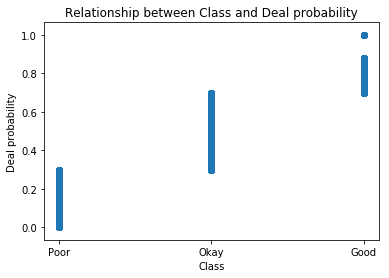

In [38]:
plt.scatter(df_train.deal_class_5, df_train.deal_probability)
plt.xlabel("Class")
plt.ylabel("Deal probability")
plt.title("Relationship between Class and Deal probability")

Text(0.5,1,'Class and Counts')

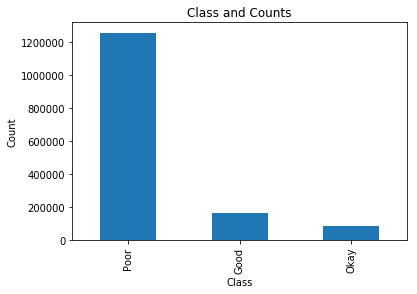

In [39]:
df_train.deal_class_5.value_counts().plot(kind='bar') 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class and Counts")

Text(0.5,1,'Relationship between Combined Parameter Length and Deal probability')

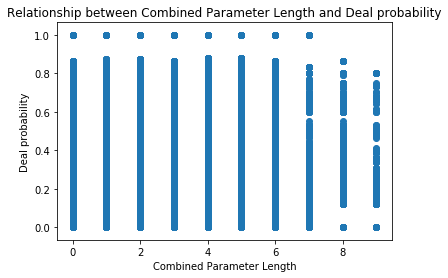

In [40]:
plt.scatter(df_train.param_combined_len, df_train.deal_probability)
plt.xlabel("Combined Parameter Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Combined Parameter Length and Deal probability")

In [41]:
df_train['param_1_len'] = df_train['param_1'].apply(lambda x : len(x.split()))

Text(0.5,1,'Relationship between Parameter 1 Length and Deal probability')

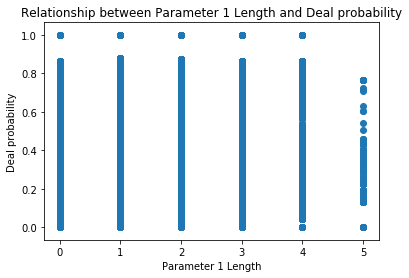

In [44]:
plt.scatter(df_train.param_1_len, df_train.deal_probability)
plt.xlabel("Parameter 1 Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Parameter 1 Length and Deal probability")

In [42]:
df_train['param_2_len'] = df_train['param_2'].apply(lambda x : len(x.split()))

Text(0.5,1,'Relationship between Parameter 2 Length and Deal probability')

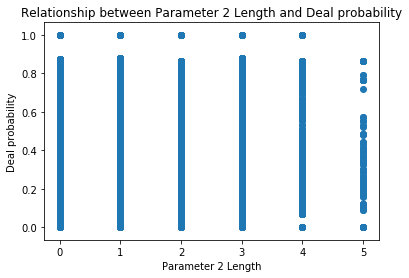

In [45]:
plt.scatter(df_train.param_2_len, df_train.deal_probability)
plt.xlabel("Parameter 2 Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Parameter 2 Length and Deal probability")

In [43]:
df_train['param_3_len'] = df_train['param_3'].apply(lambda x : len(x.split()))

Text(0.5,1,'Relationship between Parameter 3 Length and Deal probability')

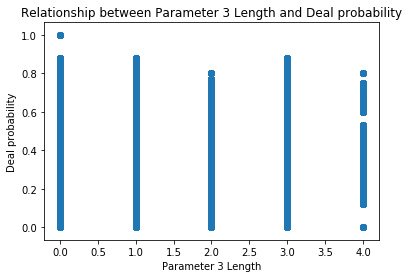

In [46]:
plt.scatter(df_train.param_3_len, df_train.deal_probability)
plt.xlabel("Parameter 3 Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Parameter 3 Length and Deal probability")

Text(0.5,1,'Relationship between Description Length and Deal probability')

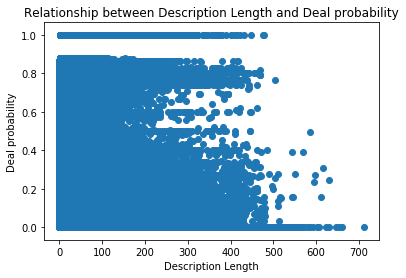

In [47]:
plt.scatter(df_train.description_len, df_train.deal_probability)
plt.xlabel("Description Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Description Length and Deal probability")

Text(0.5,1,'Relationship between Title Length and Deal probability')

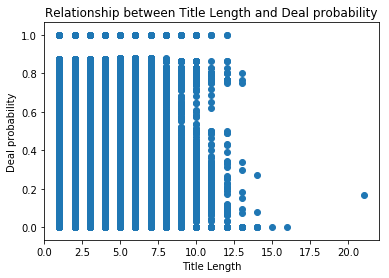

In [48]:
plt.scatter(df_train.title_len, df_train.deal_probability)
plt.xlabel("Title Length")
plt.ylabel("Deal probability")
plt.title("Relationship between Title Length and Deal probability")

##### Its clear that there are no deal probabilities between 0.88 and 0.99 :

Text(0.5,1,'Relationship between deal probability and Deal probability')

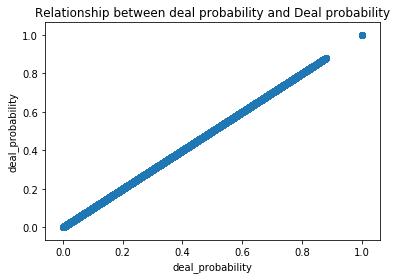

In [49]:
plt.scatter(df_train.deal_probability, df_train.deal_probability)
plt.xlabel("deal_probability")
plt.ylabel("deal_probability")
plt.title("Relationship between deal probability and Deal probability")

In [52]:
df_train[ df_train.deal_probability.between(0.89, 0.99) ].deal_probability

Series([], Name: deal_probability, dtype: float64)

Text(0.5,1,'Relationship between Region and Deal probability')

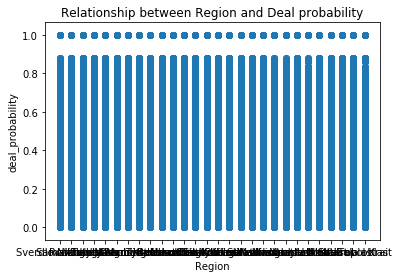

In [53]:
plt.scatter(df_train.region_en, df_train.deal_probability)
plt.xlabel("Region")
plt.ylabel("deal_probability")
plt.title("Relationship between Region and Deal probability")

Text(0.5,1,'Relationship between parent_category_name_en and Deal probability')

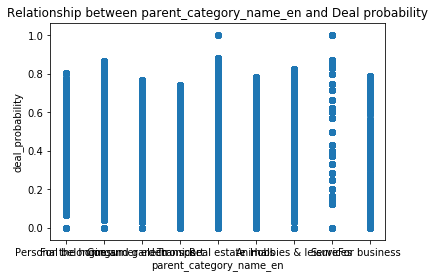

In [54]:
plt.scatter(df_train.parent_category_name_en, df_train.deal_probability)
plt.xlabel("parent_category_name_en")
plt.ylabel("deal_probability")
plt.title("Relationship between parent_category_name_en and Deal probability")

Text(0.5,1,'Relationship between category_name_en and Deal probability')

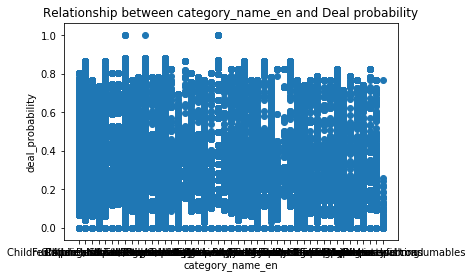

In [55]:
plt.scatter(df_train.category_name_en, df_train.deal_probability)
plt.xlabel("category_name_en")
plt.ylabel("deal_probability")
plt.title("Relationship between category_name_en and Deal probability")

In [58]:
import numpy as np 

/opt/conda/anaconda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5,1,'Relationship between price and Deal probability')

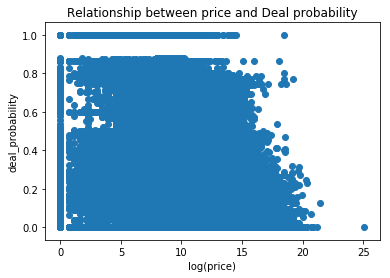

In [59]:
plt.scatter(np.log(df_train.price.astype('float64')), df_train.deal_probability)
plt.xlabel("log(price)")
plt.ylabel("deal_probability")
plt.title("Relationship between price and Deal probability")

Text(0.5,1,'Relationship between Image Top 1 and Deal probability')

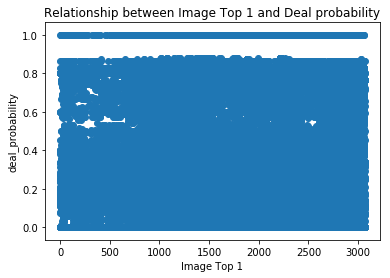

In [60]:
plt.scatter(df_train.image_top_1, df_train.deal_probability)
plt.xlabel("Image Top 1")
plt.ylabel("deal_probability")
plt.title("Relationship between Image Top 1 and Deal probability")

Add a new field to see if image is present :

In [61]:
df_train['image_present'] = df_train['image'].isna()

In [62]:
df_train['image_present'].value_counts()

False    1390836
True      112588
Name: image_present, dtype: int64

Text(0.5,1,'Class and Counts')

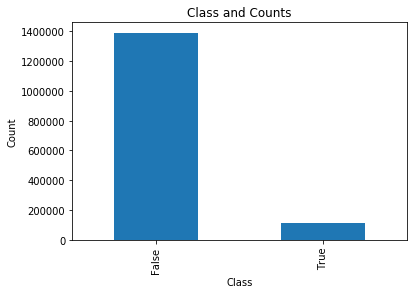

In [63]:

df_train.image_present.value_counts().plot(kind='bar') 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class and Counts")

Saving required data for modeling

In [64]:
new_df_three = df_train[['region_en','category_name_en','parent_category_name_en','user_type','weekend','price','description_len','title_len','param_combined_len','image_present','image_top_1','deal_class_5']]

In [65]:
new_df_three.to_csv('gs://dataproc-e3bd1f7b-2e29-4da6-a5c4-077c164fd32a-us-central1/avito/test/three_class_model_train.csv',index=False)

#### Other Data plots

Here we see that most of the items have less than 10% chance of getting sold 

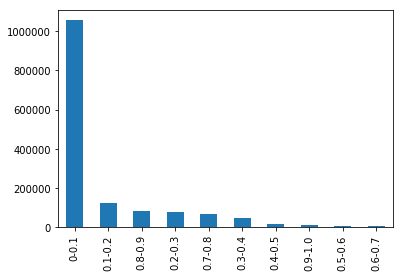

In [37]:
df_train.deal_class_2.value_counts().plot(kind='bar')

Most of the items have less than 50% chance of being sold

In [ ]:
df_train.deal_class.value_counts().plot(kind='bar')

#### Clothing, shoes, accessories and Children's clothing and shoes are the highest occuring categories

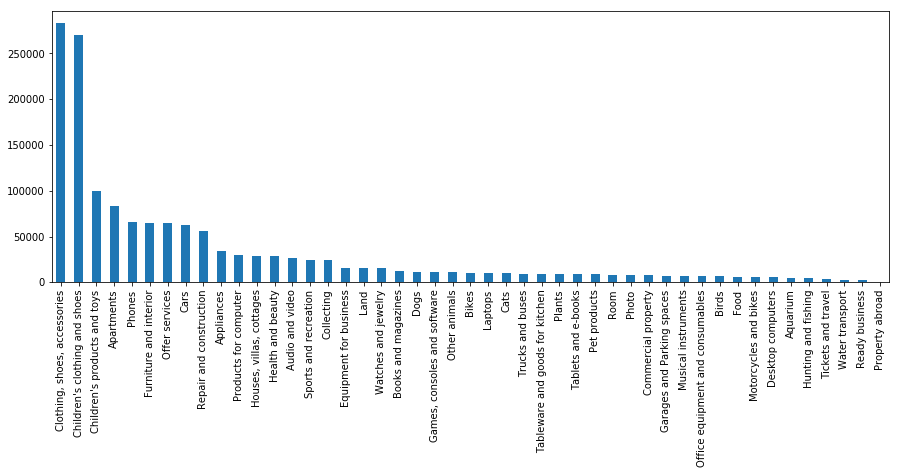

In [39]:
df_train.category_name_en.value_counts().plot(kind='bar',figsize = (15,5))

#### Personal belongings is the most occuring parent category

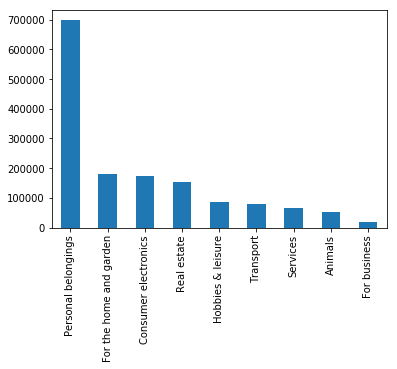

In [40]:
df_train.parent_category_name_en.value_counts().plot(kind='bar')

#### Histogram with regions is plotted below

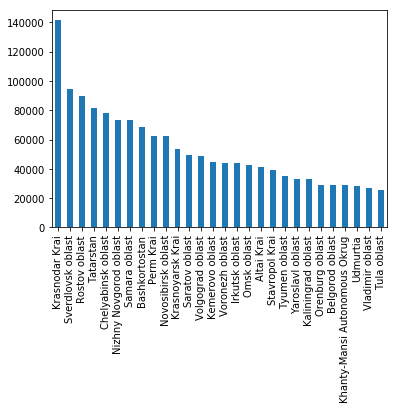

In [41]:
df_train.region_en.value_counts().plot(kind='bar')

#### Items are sold almost eqally on all days, weekends being slightly higher

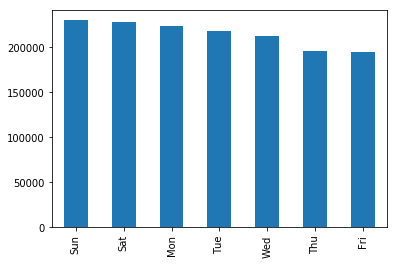

In [42]:
df_train.weekday_en.value_counts().plot(kind='bar')

#### It is strange that most of the items are sold after 13 days. 
#### We may also assume that the items are automatically removed after 13 days of posting

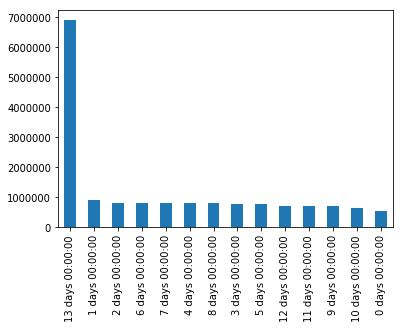

In [43]:
df_train_periods.total_period.value_counts().plot(kind='bar')

In [44]:
df_train_periods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16687412 entries, 0 to 16687411
Data columns (total 5 columns):
item_id            object
activation_date    datetime64[ns]
date_from          datetime64[ns]
date_to            datetime64[ns]
total_period       timedelta64[ns]
dtypes: datetime64[ns](3), object(1), timedelta64[ns](1)
memory usage: 636.6+ MB


#### Histogram with cities is below

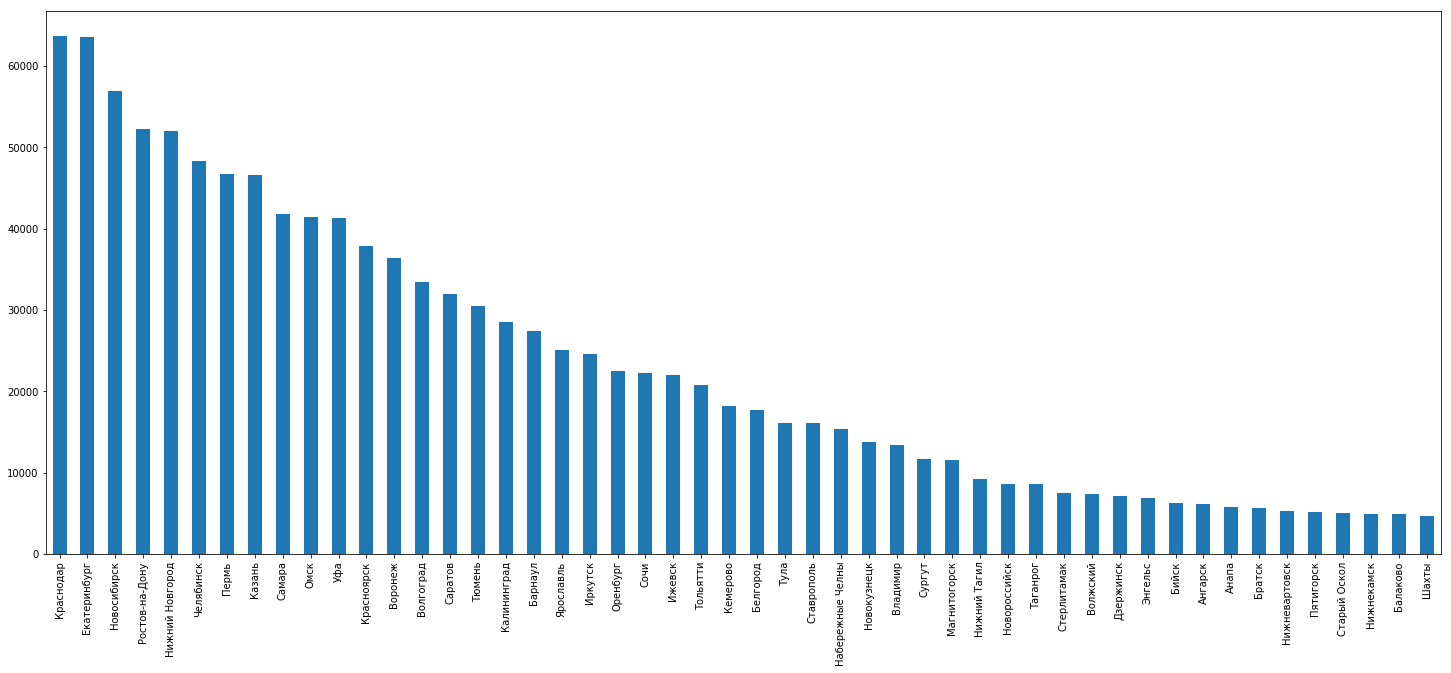

In [45]:
df_train.city.value_counts().head(50).plot(kind='bar',figsize = (25,10))